# Problem Statement 1
Overview:This case requires you to develop a customer segmentation to define marketing strategy. The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

# Goal of Model:
Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:

1- Monthly average purchase and cash advance amount

2- Purchases by type (one-off, installments)

3- Average amount per purchase and cash advance transaction,

4- Limit usage (balance to credit limit ratio),

5- Payments to minimum payments ratio etc.

6- Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.

7- Identification of the relationships/ affinities between services.

8- Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm to reveal the behavioural segments of credit card holders

9- Identify cluster characterisitics of the cluster using detailed profiling.

10- Provide the strategic insights and implementation of strategies for given set of cluster characteristics DATA DICTIONARY: CUST_ID: Credit card holder ID

BALANCE: Monthly average balance (based on daily balance averages)

BALANCE_FREQUENCY: Ratio of last 12 months with balance

PURCHASES: Total purchase amount spent during last 12 months

ONEOFF_PURCHASES: Total amount of one-off purchases

INSTALLMENTS_PURCHASES: Total amount of installment purchases

CASH_ADVANCE: Total cash-advance amount

PURCHASES_ FREQUENCY: Frequency of purchases (Percent of months with at least one purchase)

ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases

CASH_ADVANCE_ FREQUENCY: Cash-Advance frequency

AVERAGE_PURCHASE_TRX: Average amount per purchase transaction

CASH_ADVANCE_TRX: Average amount per cash-advance transaction

PURCHASES_TRX: Average amount per purchase transaction

CREDIT_LIMIT: Credit limit

PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period

MINIMUM_PAYMENTS: Total minimum payments due in the period.

PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance

TENURE: Number of months as a customer

# Importing neccessary libraries

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Loading the data
# Reading data into dataframe
cust_data = pd.read_csv('Data_problem  1.csv')

In [6]:
# Information about dataset
cust_data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [4]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Now doing Data Inspection

In [7]:
#convert column names to lower case for easy interpretation
cust_data.columns = cust_data.columns.str.lower()

In [8]:
cust_data.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

In [9]:
cust_data.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
## Now Creating important derived variables

def month_avg_purchase(prch, tenure):
    return prch/tenure

def month_cash_advance(cash, tenure):
    return cash/tenure

def monthly_usage(blnc, limit):
    return blnc/limit

def prch_type(x, y):
    if ((x <= 0) & (y <= 0)):
        return 'none'
    elif((x > 0) & (y <= 0)):
        return 'one_off'
    elif((x <= 0) & (y > 0)):
        return 'installments'
    elif((x > 0) & (y > 0)):
        return 'both'
        

In [11]:
cust_data['monthly_avg_purchase'] = cust_data.apply(lambda x : month_avg_purchase(x['purchases'], x['tenure']), axis = 1)
cust_data['monthly_cash_advance'] = cust_data.apply(lambda x : month_cash_advance(x['cash_advance'], x['tenure']), axis = 1)
cust_data['monthly_usage'] = cust_data.apply(lambda x : monthly_usage(x['balance'], x['credit_limit']), axis = 1)
cust_data['purchase_type'] = cust_data.apply(lambda x : prch_type(x['oneoff_purchases'], x['installments_purchases']), axis = 1)

In [12]:
cust_data.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,...,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,monthly_avg_purchase,monthly_cash_advance,monthly_usage,purchase_type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,installments
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,none
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,one_off
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,NaN,0.000000,12,124.916667,17.149001,0.222223,one_off
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,one_off


In [21]:
##Renaming the columns for better undersatnding
#purchases_frequency - freq of months wth atleast 1 purchase
#balance_frequency - balance in last 12months/ balance

cust_data.rename(columns = {'balance' : 'avg_monthly_balance'}, inplace=True)

In [14]:
cust_data.head()

,cust_id,avg_monthly_balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,...,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,monthly_avg_purchase,monthly_cash_advance,monthly_usage,purchase_type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,installments
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,none
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,one_off
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,NaN,0.000000,12,124.916667,17.149001,0.222223,one_off
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,one_off


# Now will do Profiling

In [25]:
import pandas_profiling
#cust = cust_data.profile_report()
#cust.to_file(output_file = 'cust_segmentation_profile.html')

From here we can see that Purchases is highly correlated with one-off purchases variable

# Identifying Categorical and continous variables

In [26]:
#Getting the information
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   avg_monthly_balance               8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [27]:
numeric_var_names=[key for key in dict(cust_data.dtypes) if dict(cust_data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(cust_data.dtypes) if dict(cust_data.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['avg_monthly_balance', 'balance_frequency', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment', 'tenure', 'monthly_avg_purchase', 'monthly_cash_advance', 'monthly_usage']
['cust_id', 'purchase_type']


In [28]:
cust_data.isna().sum()

cust_id                               0
avg_monthly_balance                   0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
monthly_avg_purchase                  0
monthly_cash_advance                  0
monthly_usage                         1
purchase_type                         0
dtype: int64

# Now getting the Data audit report

In [29]:
def continous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),x.std(),
                      x.var(), x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), x.quantile(0.25),
                      x.quantile(0.50), x.quantile(0.75), x.quantile(0.90), x.quantile(0.95), 
                      x.quantile(0.99), x.max()],
                    index = ['N', 'NMiss', 'Sum', 'Mean', 'Median', 'SD', 'Var', 'Min', 'P1', 'P5', 'P10','P25',
                            'P50', 'P75', 'P90', 'P95', 'P99', 'Max'])

In [30]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0,1],
                     round((Mode.iloc[0,1]*100)/x.count(), 2)],
                     index = ['N', 'NMiss', 'Mode', 'Freq', 'Percent'])

In [31]:
cust_data[numeric_var_names].apply(lambda x : continous_var_summary(x)).T.round(1)

,N,NMiss,Sum,Mean,Median,SD,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
avg_monthly_balance,8950.0,0.0,14002049.7,1564.5,873.4,2081.5,4332775.0,0.0,0.1,8.8,23.6,128.3,873.4,2054.1,4338.6,5909.1,9338.8,19043.1
balance_frequency,8950.0,0.0,7851.6,0.9,1.0,0.2,0.1,0.0,0.1,0.3,0.5,0.9,1.0,1.0,1.0,1.0,1.0,1.0
purchases,8950.0,0.0,8978683.3,1003.2,361.3,2136.6,4565208.2,0.0,0.0,0.0,0.0,39.6,361.3,1110.1,2542.6,3998.6,8977.3,49039.6
oneoff_purchases,8950.0,0.0,5302314.5,592.4,38.0,1659.9,2755227.9,0.0,0.0,0.0,0.0,0.0,38.0,577.4,1600.1,2671.1,6689.9,40761.2
installments_purchases,8950.0,0.0,3679055.4,411.1,89.0,904.3,817827.4,0.0,0.0,0.0,0.0,0.0,89.0,468.6,1140.1,1750.1,3886.2,22500.0
cash_advance,8950.0,0.0,8760896.5,978.9,0.0,2097.2,4398096.3,0.0,0.0,0.0,0.0,0.0,0.0,1113.8,3065.5,4647.2,9588.2,47137.2
purchases_frequency,8950.0,0.0,4388.6,0.5,0.5,0.4,0.2,0.0,0.0,0.0,0.0,0.1,0.5,0.9,1.0,1.0,1.0,1.0
oneoff_purchases_frequency,8950.0,0.0,1812.0,0.2,0.1,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.3,0.8,1.0,1.0,1.0
purchases_installments_frequency,8950.0,0.0,3261.7,0.4,0.2,0.4,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.8,1.0,1.0,1.0,1.0
cash_advance_frequency,8950.0,0.0,1209.5,0.1,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.6,0.8,1.5


In [32]:
cust_data[cat_var_names].apply(lambda x : categorical_var_summary(x)).T.round(1)

,N,NMiss,Mode,Freq,Percent
cust_id,8950,0,C10001,1,0.01
purchase_type,8950,0,both,2774,30.99


# Data Cleaning

1. Outlier treatment

In [33]:
#Handling Outliers - at 99%tile or 95%tile if required 
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    x = x.clip(lower=x.quantile(0.05))
    return x

In [34]:
cust_data[numeric_var_names]=cust_data[numeric_var_names].apply(lambda x: outlier_capping(x))

2. Missing value imputation

In [35]:
#Handling missings values
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

In [38]:
cust_data[numeric_var_names]=cust_data[numeric_var_names].apply(lambda x: Missing_imputation(x))

In [39]:
cust_data[numeric_var_names].apply(lambda x : continous_var_summary(x)).round(3).T

,N,NMiss,Sum,Mean,Median,SD,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
avg_monthly_balance,8950.0,0.0,1.299898e+07,1452.400,873.385,1688.929,2.852482e+06,8.815,8.815,8.817,23.576,128.282,873.385,2054.140,4338.564,5907.795,5909.112,5909.112
balance_frequency,8950.0,0.0,7.905106e+03,0.883,1.000,0.218,4.800000e-02,0.273,0.273,0.273,0.455,0.889,1.000,1.000,1.000,1.000,1.000,1.000
purchases,8950.0,0.0,7.373574e+06,823.863,361.280,1099.813,1.209589e+06,0.000,0.000,0.000,0.000,39.635,361.280,1110.130,2542.624,3997.904,3998.619,3998.619
oneoff_purchases,8950.0,0.0,4.009141e+06,447.949,38.000,746.134,5.567153e+05,0.000,0.000,0.000,0.000,0.000,38.000,577.405,1600.099,2668.946,2671.094,2671.094
installments_purchases,8950.0,0.0,3.010208e+06,336.336,89.000,497.830,2.478349e+05,0.000,0.000,0.000,0.000,0.000,89.000,468.638,1140.070,1748.442,1750.087,1750.087
cash_advance,8950.0,0.0,7.313592e+06,817.161,0.000,1349.178,1.820282e+06,0.000,0.000,0.000,0.000,0.000,0.000,1113.821,3065.535,4643.581,4647.169,4647.169
purchases_frequency,8950.0,0.0,4.388637e+03,0.490,0.500,0.401,1.610000e-01,0.000,0.000,0.000,0.000,0.083,0.500,0.917,1.000,1.000,1.000,1.000
oneoff_purchases_frequency,8950.0,0.0,1.811996e+03,0.202,0.083,0.298,8.900000e-02,0.000,0.000,0.000,0.000,0.000,0.083,0.300,0.750,1.000,1.000,1.000
purchases_installments_frequency,8950.0,0.0,3.261714e+03,0.364,0.167,0.397,1.580000e-01,0.000,0.000,0.000,0.000,0.000,0.167,0.750,1.000,1.000,1.000,1.000
cash_advance_frequency,8950.0,0.0,1.142355e+03,0.128,0.000,0.177,3.100000e-02,0.000,0.000,0.000,0.000,0.000,0.000,0.222,0.417,0.583,0.583,0.583


In [40]:
### Correlation Matrix

<AxesSubplot:>

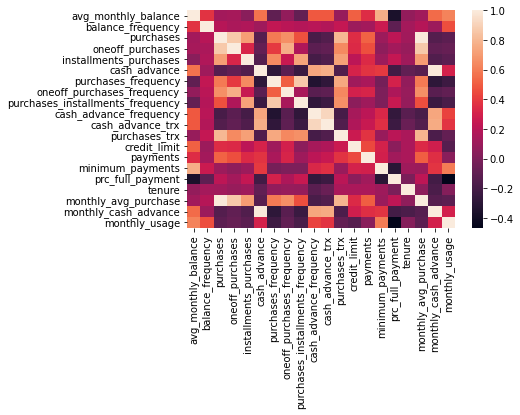

In [41]:
cust_corr = cust_data.corr()
#cust_corr.to_excel('cust_corr.xlsx')
sns.heatmap(cust_corr)

1.purchases with one off & monthly_avg_purchase

2.one-off with monthly_avg_purchase

3.cash_adv wth monthly_cash advance

We can drop purchases column and cash_adv based on our finding from correlation matrix

3. Dummy variable creation

In [42]:
#function for creating dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first= True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace= True)
    return df

In [43]:
cat_var_names = cust_data[cat_var_names].columns.difference(['cust_id'])
cat_var = cust_data[cat_var_names]
cat_var.head()

,purchase_type
0,installments
1,none
2,one_off
3,one_off
4,one_off


In [44]:
for c_feature in cat_var_names:
    cat_var[c_feature] = cat_var[c_feature].astype('category')
    cat_var = create_dummies(cat_var, c_feature)

In [45]:
cat_var.head()

,purchase_type_installments,purchase_type_none,purchase_type_one_off
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


4. Dropping unecessary variables

In [46]:
#As cust_id is unique and have no variance so it may add unecessary noise to our data. Hence we have to drop it

cust_data.drop(columns=['cust_id'], inplace=True)

# Now Combining numeric and categorical data

In [47]:
data_final = pd.concat([cust_data[numeric_var_names], cat_var], axis = 1)

In [48]:
data_final.head()

,avg_monthly_balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,...,payments,minimum_payments,prc_full_payment,tenure,monthly_avg_purchase,monthly_cash_advance,monthly_usage,purchase_type_installments,purchase_type_none,purchase_type_one_off
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,0.000000,425.548562,0.457495,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,89.988924,643.387510,0.000000,12,124.916667,17.149001,0.222223,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,0,0,1


# Standardizing the data

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
data_final.columns

Index(['avg_monthly_balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure',
       'monthly_avg_purchase', 'monthly_cash_advance', 'monthly_usage',
       'purchase_type_installments', 'purchase_type_none',
       'purchase_type_one_off'],
      dtype='object')

In [51]:
#prescreening of variables to remove less useful vraiable for segmentation
data_feature = data_final.drop(columns=['purchases', 'cash_advance'], axis = 1)

In [52]:
sc = StandardScaler()

In [53]:
data_final_scaled = pd.DataFrame(sc.fit_transform(data_feature))

In [54]:
data_final_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.835783,-0.297904,-0.600394,-0.483999,-0.806490,-0.678661,-0.707313,-0.722502,-0.636381,-0.680426,...,-0.800356,-0.704768,-0.525551,0.378995,-0.672440,-0.600126,-0.990035,1.720516,-0.543690,-0.514625
1,1.036257,0.118296,-0.600394,-0.675642,-1.221758,-0.678661,-0.916995,0.692644,0.295454,-0.807798,...,1.643245,0.599971,0.234227,0.378995,-0.757187,2.868023,0.212119,-0.581221,1.839282,-0.514625
2,0.617437,0.534496,0.435900,-0.675642,1.269843,2.673451,-0.916995,-0.722502,-0.636381,-0.043563,...,-0.537116,-0.022523,-0.525551,0.378995,-0.070357,-0.600126,-0.148038,-0.581221,-0.543690,1.943162
3,0.126875,-1.130304,1.408742,-0.675642,-1.014125,-0.399319,-0.916995,-0.250789,-0.403422,-0.744112,...,-0.870392,0.000000,-0.525551,0.378995,0.574420,-0.460364,-0.466800,-0.581221,-0.543690,1.943162
4,-0.375812,0.534496,-0.578948,-0.675642,-1.014125,-0.399319,-0.916995,-0.722502,-0.636381,-0.744112,...,-0.501872,-0.557512,-0.525551,0.378995,-0.742974,-0.600126,0.858316,-0.581221,-0.543690,1.943162


# Applying PCA to reduce the variables

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components=21)
pca.fit(data_final_scaled)

PCA(n_components=21)

In [57]:
pca.explained_variance_ 

array([5.73228018, 4.44153355, 2.27385031, 1.59425874, 1.17268958,
       1.10860598, 0.87407236, 0.70617091, 0.65971489, 0.47907863,
       0.43139694, 0.35085559, 0.22461165, 0.20929513, 0.20213626,
       0.16982207, 0.12919335, 0.10642866, 0.07567357, 0.03843819,
       0.0222401 ])

In [58]:
#The amount of variance that each PC explains
var = pca.explained_variance_ratio_
var

array([0.27293522, 0.21147797, 0.10826649, 0.0759086 , 0.05583612,
       0.05278486, 0.04161784, 0.03362343, 0.03141148, 0.02281072,
       0.02054042, 0.01670554, 0.0106946 , 0.00996532, 0.00962446,
       0.00808586, 0.00615138, 0.00506747, 0.0036031 , 0.00183019,
       0.00105893])

In [59]:
#cummilative var explained
var1 = np.cumsum(np.round(pca.explained_variance_ratio_ , decimals=4)*100)
var1

array([ 27.29,  48.44,  59.27,  66.86,  72.44,  77.72,  81.88,  85.24,
        88.38,  90.66,  92.71,  94.38,  95.45,  96.45,  97.41,  98.22,
        98.84,  99.35,  99.71,  99.89, 100.  ])

In [60]:
pd.DataFrame({'Eigen Values' : pca.explained_variance_, 'Cumulative Variance' : var1}, index=range(1,22))

,Eigen Values,Cumulative Variance
1,5.732280,27.29
2,4.441534,48.44
3,2.273850,59.27
4,1.594259,66.86
5,1.172690,72.44
6,1.108606,77.72
7,0.874072,81.88
8,0.706171,85.24
9,0.659715,88.38
10,0.479079,90.66


either 7 or 8 seems a perfect candidate for no of componenets in our clustering model

In [61]:
pca_final = PCA(n_components=7).fit(data_final_scaled)

In [62]:
pca_final.explained_variance_

array([5.73228018, 4.44153355, 2.27385031, 1.59425874, 1.17268958,
       1.10860597, 0.87407236])

In [63]:
reduced_cr = pca_final.fit_transform(data_final_scaled)

In [64]:
dimensions = pd.DataFrame(reduced_cr)
dimensions.columns = ["C1", "C2", "C3", "C4", "C5","C6", "C7"]

In [65]:
print(dimensions.shape)
print(dimensions.head())

(8950, 7)
         C1        C2        C3        C4        C5        C6        C7
0 -0.728270 -2.807740 -0.531669 -0.307628 -0.523168  0.189983 -0.156802
1 -2.924920  2.113690 -0.119397  1.742452 -1.269550 -0.891843  0.059924
2  1.076890  0.457086  2.587508 -1.728659 -0.230368  1.092685 -0.556508
3 -0.497875 -0.404395  2.615011 -0.522531 -1.163943  1.038051  0.630942
4 -1.470361 -1.386808  1.409173 -2.032670  0.046589  0.438313 -0.629557


# Clustering model(k-means)

In [67]:
from sklearn.cluster import KMeans

In [68]:
km_3 = KMeans(n_clusters=3, random_state=123)
km_3.fit(dimensions)

KMeans(n_clusters=3, random_state=123)

In [69]:
km_4 = KMeans(n_clusters=4, random_state=123).fit(dimensions)
km_5 = KMeans(n_clusters=5, random_state=123).fit(dimensions)
km_6 = KMeans(n_clusters=6, random_state=123).fit(dimensions)
km_7 = KMeans(n_clusters=7, random_state=123).fit(dimensions)
km_8 = KMeans(n_clusters=8, random_state=123).fit(dimensions)
km_9 = KMeans(n_clusters=9, random_state=123).fit(dimensions)

In [70]:
# save the cluster labels and sort by cluster
data_final['cluster_3'] = km_3.labels_
data_final['cluster_4'] = km_4.labels_
data_final['cluster_5'] = km_5.labels_
data_final['cluster_6'] = km_6.labels_
data_final['cluster_7'] = km_7.labels_
data_final['cluster_8'] = km_8.labels_
data_final['cluster_9'] = km_9.labels_

In [71]:
data_final.head(10)

,avg_monthly_balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,...,purchase_type_installments,purchase_type_none,purchase_type_one_off,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,40.900749,0.818182,95.4000,0.000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,1,0,0,1,0,1,2,5,2,2
1,3202.467416,0.909091,0.0000,0.000,0.00,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0,1,0,2,2,4,1,1,1,1
2,2495.148862,1.000000,773.1700,773.170,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,0,0,1,1,1,2,4,2,0,0
3,1666.670542,0.636364,1499.0000,1499.000,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0,0,1,1,1,2,4,2,0,0
4,817.714335,1.000000,16.0000,16.000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,0,0,1,1,1,2,4,2,0,0
5,1809.828751,1.000000,1333.2800,0.000,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,...,1,0,0,1,0,1,5,0,7,7
6,627.260806,1.000000,3998.6195,2671.094,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,...,0,0,0,0,3,3,0,3,4,4
7,1823.652743,1.000000,436.2000,0.000,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,...,1,0,0,1,0,1,5,0,7,7
8,1014.926473,1.000000,861.4900,661.490,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,...,0,0,0,1,1,2,4,2,0,0
9,152.225975,0.545455,1281.6000,1281.600,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,0,0,1,1,1,2,4,2,2,2


# Segment Size check

In [72]:
data_final['cluster_3'].value_counts()

1    4325
2    2946
0    1679
Name: cluster_3, dtype: int64

In [73]:
data_final['cluster_3'].value_counts()/sum(data_final['cluster_3'].value_counts())

1    0.483240
2    0.329162
0    0.187598
Name: cluster_3, dtype: float64

In [74]:
data_final['cluster_4'].value_counts()/sum(data_final['cluster_4'].value_counts())

0    0.307486
2    0.292849
1    0.231732
3    0.167933
Name: cluster_4, dtype: float64

In [75]:
data_final['cluster_5'].value_counts()/sum(data_final['cluster_5'].value_counts())

1    0.309050
2    0.213408
0    0.190279
3    0.157877
4    0.129385
Name: cluster_5, dtype: float64

In [76]:
data_final['cluster_6'].value_counts()/sum(data_final['cluster_6'].value_counts())

2    0.213520
4    0.191397
3    0.186592
5    0.152067
0    0.140894
1    0.115531
Name: cluster_6, dtype: float64

Here we can choose 5-6 cluster solution as optimum solution

# Quantitative Evaluation

# 1. Silhouette Coefficient(Higher the better)

In [77]:
# Importing required library for that
from sklearn import  metrics

In [78]:
metrics.silhouette_score(dimensions, labels=km_3.labels_)

0.24776931040457287

In [79]:
k_range = range(2, 16)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(dimensions)
    scores.append(metrics.silhouette_score(dimensions, labels=km.labels_))

In [80]:
scores

[0.22489159543203277,
 0.24776931040457287,
 0.24439881154523885,
 0.2705034684418866,
 0.25675712041657484,
 0.2544408377978831,
 0.2380051465221703,
 0.24430908115902136,
 0.24115019097634272,
 0.23301696537253286,
 0.24396228476263074,
 0.23893122353695148,
 0.24503447891413632,
 0.24159418760558607]

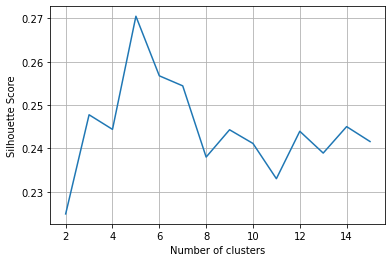

In [81]:
plt.plot( k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid('True')

Here 5 cluter seems optimal solution as the sc score is highest around it.

# 2. Elbow Analysis

In [82]:
cluster_range= range(2, 20)
errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(dimensions)
    errors.append(clusters.inertia_)

In [83]:
errors

[118341.88281381114,
 93567.48783365003,
 80317.24100802519,
 69547.87406081331,
 63816.07048423996,
 59677.20176847307,
 56420.63462842289,
 53314.01721572004,
 50778.931545993,
 48742.187896984164,
 46110.54158997569,
 44564.45255043107,
 42666.86897052328,
 40985.63539579038,
 39325.674945424296,
 37907.86642694704,
 37175.99066932214,
 35766.80947604929]

In [84]:
clusters_df = pd.DataFrame({'Cluster_no' : range(2, 20), 'Unexpalined_variance' : errors})
clusters_df[0:10]

,Cluster_no,Unexpalined_variance
0,2,118341.882814
1,3,93567.487834
2,4,80317.241008
3,5,69547.874061
4,6,63816.070484
5,7,59677.201768
6,8,56420.634628
7,9,53314.017216
8,10,50778.931546
9,11,48742.187897


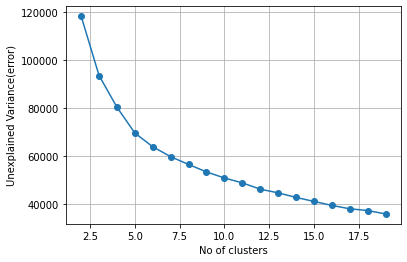

In [85]:
%matplotlib inline
plt.plot(clusters_df.Cluster_no, clusters_df.Unexpalined_variance, marker = 'o')
plt.xlabel('No of clusters')
plt.ylabel('Unexplained Variance(error)')
plt.grid('True')

Here after cluster 7 the incremental decrease in error is almost constant

# Qualitative Analysis(Profiling)

In [87]:
data_final.head()

,avg_monthly_balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,...,purchase_type_installments,purchase_type_none,purchase_type_one_off,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1,0,0,1,0,1,2,5,2,2
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0,1,0,2,2,4,1,1,1,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0,0,1,1,1,2,4,2,0,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0,0,1,1,1,2,4,2,0,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0,0,1,1,1,2,4,2,0,0


In [88]:
size = pd.concat([pd.Series(data_final.cluster_3.size), pd.Series(data_final.cluster_3.value_counts()).sort_index(), pd.Series(data_final.cluster_4.value_counts()).sort_index(),
          pd.Series(data_final.cluster_5.value_counts()).sort_index(), pd.Series(data_final.cluster_6.value_counts()).sort_index(), pd.Series(data_final.cluster_7.value_counts()).sort_index(),
          pd.Series(data_final.cluster_8.value_counts()).sort_index(), pd.Series(data_final.cluster_9.value_counts()).sort_index()])
size

0    8950
0    1679
1    4325
2    2946
0    2752
1    2074
2    2621
3    1503
0    1703
1    2766
2    1910
3    1413
4    1158
0    1261
1    1034
2    1911
3    1670
4    1713
5    1361
0    1317
1    1036
2    1665
3    1013
4    1607
5    1834
6     478
0    1282
1     946
2     975
3     463
4    1014
5    1563
6    1498
7    1209
0    1241
1     870
2     939
3     462
4    1006
5    1552
6    1316
7    1155
8     409
dtype: int64

In [89]:
Seg_size = pd.DataFrame(size, columns=['seg_size'])
Seg_pct = pd.DataFrame(size/data_final.cluster_3.size, columns= ['Seg_pct'])

In [90]:
pd.concat([Seg_size.T, Seg_pct.T], axis = 0)

,0,0,1,2,0,1,2,3,0,1,...,7,0,1,2,3,4,5,6,7,8
seg_size,8950.0,1679.000000,4325.00000,2946.000000,2752.000000,2074.000000,2621.000000,1503.000000,1703.000000,2766.00000,...,1209.000000,1241.000000,870.000000,939.000000,462.00000,1006.000000,1552.000000,1316.000000,1155.00000,409.000000
Seg_pct,1.0,0.187598,0.48324,0.329162,0.307486,0.231732,0.292849,0.167933,0.190279,0.30905,...,0.135084,0.138659,0.097207,0.104916,0.05162,0.112402,0.173408,0.147039,0.12905,0.045698


In [94]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profiling_output = pd.concat([data_final.apply(lambda x: x.mean()).T, data_final.groupby('cluster_3').apply(lambda x : x.mean()).T,
                             data_final.groupby('cluster_4').apply(lambda x : x.mean()).T, data_final.groupby('cluster_5').apply(lambda x : x.mean()).T, 
                             data_final.groupby('cluster_6').apply(lambda x : x.mean()).T, data_final.groupby('cluster_7').apply(lambda x : x.mean()).T,
                             data_final.groupby('cluster_8').apply(lambda x : x.mean()).T, data_final.groupby('cluster_9').apply(lambda x : x.mean()).T], axis =1)


In [95]:
Profiling_output

,0,0,1,2,0,1,2,3,0,1,...,7,0,1,2,3,4,5,6,7,8
avg_monthly_balance,1452.399593,2037.937810,532.145086,2469.705117,530.968078,843.883839,2540.004598,2082.624798,1397.679526,492.195598,...,1706.064591,1234.852237,4284.400043,99.067693,4330.084970,808.896067,132.432017,1583.523990,1737.810992,1308.556659
balance_frequency,0.883252,0.976572,0.812409,0.934071,0.844590,0.797486,0.936641,0.979290,0.869256,0.840746,...,0.988605,0.962829,0.975819,0.429130,0.989274,0.969962,0.848626,0.942298,0.991382,0.790499
purchases,823.863022,2711.583553,536.126155,170.427576,576.618950,570.219555,146.606147,2807.603878,8.116195,572.302108,...,704.105310,659.269458,339.603011,325.592406,3207.749830,2656.124362,578.484246,6.785023,715.362216,164.335526
oneoff_purchases,447.948730,1565.574263,239.171612,117.489722,74.749052,530.195787,94.333072,1634.436925,4.739307,79.479320,...,209.781596,633.211143,226.674605,245.812596,1788.173303,1605.964199,39.471250,4.560372,208.815446,110.323839
installments_purchases,336.336040,948.952778,291.906603,52.416764,485.750309,32.140800,51.687370,978.902257,3.376888,477.019023,...,477.189516,13.418566,109.637997,78.066632,1172.485844,880.574227,520.922582,2.224650,488.163719,54.011687
cash_advance,817.161146,573.537922,122.921347,1975.216313,152.956478,259.579258,2086.335881,589.489223,1226.961777,134.486279,...,476.720502,350.626470,3542.580210,188.355587,1414.492203,117.108594,37.382205,1118.606579,444.404009,1967.866531
purchases_frequency,0.490351,0.916174,0.567532,0.134354,0.734578,0.321690,0.117336,0.926385,0.009361,0.726710,...,0.724123,0.371688,0.245007,0.200365,0.926286,0.924956,0.803353,0.005095,0.723444,0.192024
oneoff_purchases_frequency,0.202458,0.603806,0.139973,0.065453,0.048181,0.287675,0.052044,0.629645,0.003128,0.050608,...,0.125916,0.360499,0.114960,0.098904,0.588905,0.670636,0.029879,0.002095,0.123518,0.081187
purchases_installments_frequency,0.364437,0.703693,0.431042,0.073306,0.684930,0.047207,0.070658,0.727667,0.006467,0.675276,...,0.646792,0.017547,0.144855,0.098667,0.778973,0.684931,0.754102,0.003183,0.650056,0.114839
cash_advance_frequency,0.127637,0.082468,0.028806,0.298474,0.030402,0.058323,0.309443,0.084281,0.221787,0.028321,...,0.098599,0.080434,0.433474,0.021460,0.176291,0.028445,0.007773,0.219307,0.090034,0.319167


In [96]:
Profiling_output_final=pd.concat([Seg_size.T, Seg_pct.T, Profiling_output], axis=0)
Profiling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',
                                'KM9_1', 'KM9_2', 'KM9_3', 'KM9_4', 'KM9_5','KM9_6','KM9_7','KM9_8', 'KM9_9']

In [97]:
Profiling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM8_8,KM9_1,KM9_2,KM9_3,KM9_4,KM9_5,KM9_6,KM9_7,KM9_8,KM9_9
seg_size,8950.000000,1679.000000,4325.000000,2946.000000,2752.000000,2074.000000,2621.000000,1503.000000,1703.000000,2766.000000,...,1209.000000,1241.000000,870.000000,939.000000,462.000000,1006.000000,1552.000000,1316.000000,1155.000000,409.000000
Seg_pct,1.000000,0.187598,0.483240,0.329162,0.307486,0.231732,0.292849,0.167933,0.190279,0.309050,...,0.135084,0.138659,0.097207,0.104916,0.051620,0.112402,0.173408,0.147039,0.129050,0.045698
avg_monthly_balance,1452.399593,2037.937810,532.145086,2469.705117,530.968078,843.883839,2540.004598,2082.624798,1397.679526,492.195598,...,1706.064591,1234.852237,4284.400043,99.067693,4330.084970,808.896067,132.432017,1583.523990,1737.810992,1308.556659
balance_frequency,0.883252,0.976572,0.812409,0.934071,0.844590,0.797486,0.936641,0.979290,0.869256,0.840746,...,0.988605,0.962829,0.975819,0.429130,0.989274,0.969962,0.848626,0.942298,0.991382,0.790499
purchases,823.863022,2711.583553,536.126155,170.427576,576.618950,570.219555,146.606147,2807.603878,8.116195,572.302108,...,704.105310,659.269458,339.603011,325.592406,3207.749830,2656.124362,578.484246,6.785023,715.362216,164.335526
oneoff_purchases,447.948730,1565.574263,239.171612,117.489722,74.749052,530.195787,94.333072,1634.436925,4.739307,79.479320,...,209.781596,633.211143,226.674605,245.812596,1788.173303,1605.964199,39.471250,4.560372,208.815446,110.323839
installments_purchases,336.336040,948.952778,291.906603,52.416764,485.750309,32.140800,51.687370,978.902257,3.376888,477.019023,...,477.189516,13.418566,109.637997,78.066632,1172.485844,880.574227,520.922582,2.224650,488.163719,54.011687
cash_advance,817.161146,573.537922,122.921347,1975.216313,152.956478,259.579258,2086.335881,589.489223,1226.961777,134.486279,...,476.720502,350.626470,3542.580210,188.355587,1414.492203,117.108594,37.382205,1118.606579,444.404009,1967.866531
purchases_frequency,0.490351,0.916174,0.567532,0.134354,0.734578,0.321690,0.117336,0.926385,0.009361,0.726710,...,0.724123,0.371688,0.245007,0.200365,0.926286,0.924956,0.803353,0.005095,0.723444,0.192024
oneoff_purchases_frequency,0.202458,0.603806,0.139973,0.065453,0.048181,0.287675,0.052044,0.629645,0.003128,0.050608,...,0.125916,0.360499,0.114960,0.098904,0.588905,0.670636,0.029879,0.002095,0.123518,0.081187


In [98]:
Profiling_output_final.to_csv('Profiling_output1.csv')

# From profiling we conclude that 8 cluster solution seems the best one. Below is the detailed characteristic description of each cluster for future marketing strategy-

Cluster 0 - These include customers with average credit limit who are mostly involved in one off type of purchases with their credit cards. They dont prefer cash transactions on their cards. They maybe targeted for offers on different partner outlets.

Cluster 1 - These are the customers with high credit limit who spend alot on purchases of both installment and one-off type. Amount and number of transactions are quite high for these card holders. As a result the balance is quite low for them.

Cluster 2 - This cluster targets a group of customers who have a high balance and cash advances with low purchase frequency. We can assume that this customer segment uses their credit cards as a loan facility.

Cluster 3 - This cluster includes uninvolved customers which rarely use their cards and that also on small amount of purchases. Hence they have low minimun payments inspite of decent credit limit. We may target them to diffrenet market strategies like emi/installments purchases.

Cluster 4 - These customers are similar to cluster no. 2 but with lower balance and lower credit limit.

Cluster 5 - These customers purchase frequently with highest amount of installment purchases contrast of a lower cash advance percentage. They have lower credit limit maybe that is the reason for not spending on other type of services. Also they pay their bill on time compared to other customers.

Cluster 6 - These are the customers who frequently use all the services with high amount whether it be any kind of purchase or cash transactions. They have the highest credit limit and minimun payment. In short these are the involved customers.

Cluster 7 - These customers are almost similar to cluster no. 5 but with higher minimum payment and they don't pay their bill on time.